# Modelling based on train and augmented train and test data

## Overview

In this notebook we focus on create more date from the given test dataset by augmenting blood glucose level predictions. We will then use the augmented data to additionally train the model and predict the test data.


## Data Augmentation

Data augmentation is a technique used to increase the size of the training dataset based on existing data or newly created synthetic data from existing data. In this case, we will use the lag features given in the test data to create more input data for the model.

For each imputed row in the test set we can create a new row by shifting the lag features by one column. This will create a new row with the same target value but with different input features. We can then use this new data to train the model.

 

In [14]:
from datetime import datetime

from src.features.helpers.extractors import extract_patient_data
import os
import pandas as pd

df_test = pd.read_csv(os.path.join('..', '..', '..', 'data', 'raw', 'test.csv'))
extracted_data = extract_patient_data(df_test, 'p24')
extracted_data


['p01' 'p02' 'p04' 'p05' 'p06' 'p10' 'p11' 'p12' 'p15' 'p16' 'p18' 'p19'
 'p21' 'p22' 'p24']


,p_num,time,bg,insulin,carbs,hr,steps,cals,activity
2020-01-02 10:40:00,p24,10:40:00,8.7,0.0708,NaN,79.1,0.0,4.39,NaN
2020-01-02 10:45:00,p24,10:45:00,8.2,0.0708,NaN,84.1,225.0,15.94,NaN
2020-01-02 10:50:00,p24,10:50:00,8.3,0.0708,NaN,104.3,41.0,12.11,NaN
2020-01-02 10:55:00,p24,10:55:00,8.8,0.0708,NaN,85.0,53.0,6.97,NaN
2020-01-02 11:00:00,p24,11:00:00,8.9,0.0708,NaN,92.2,145.0,13.20,NaN
...,...,...,...,...,...,...,...,...,...
2020-11-29 02:50:00,p24,02:50:00,6.4,0.0771,NaN,72.7,0.0,4.31,NaN
2020-11-29 02:55:00,p24,02:55:00,6.4,0.0000,NaN,71.8,NaN,4.15,NaN
2020-11-29 03:00:00,p24,03:00:00,6.4,0.0000,NaN,76.2,0.0,4.23,NaN
2020-11-29 03:05:00,p24,03:05:00,6.5,0.0327,NaN,70.5,NaN,4.15,NaN


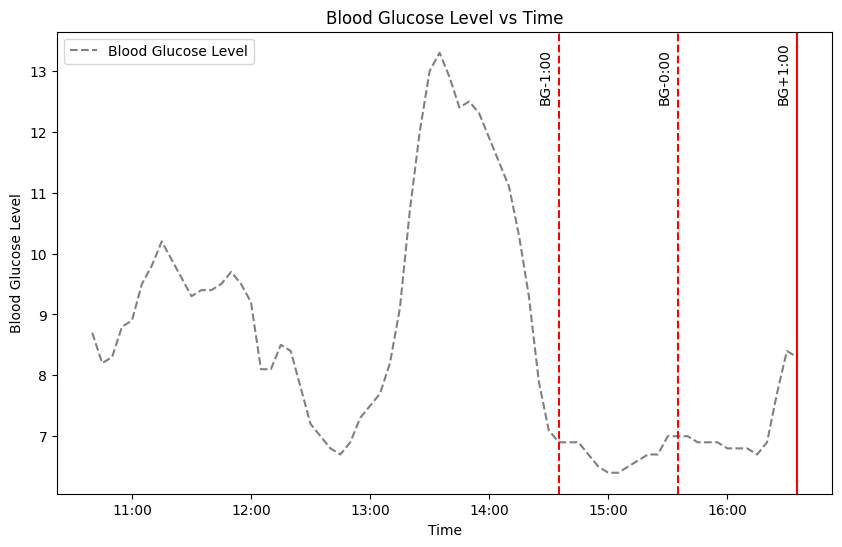

In [51]:

# plot the extracted data for the first day
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# show only data from the first day
extracted_data = extracted_data[extracted_data.index < datetime(2020, 1, 3)]
plt.figure(figsize=(10, 6))

plt.plot(extracted_data.index, extracted_data['bg'], linestyle='--', color='grey', label='Blood Glucose Level')
plt.xlabel('Time')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level vs Time')

date_format = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)

# Vertical line at 18:00 with label 'BG+1h'
plt.axvline(x=datetime(2020, 1, 2, 16, 35), color='r', linestyle='-')
plt.text(datetime(2020, 1, 2, 16, 25), 12.5, 'BG+1:00', rotation=90)

plt.axvline(x=datetime(2020, 1, 2, 15, 35), color='r', linestyle='--')
plt.text(datetime(2020, 1, 2, 15, 25), 12.5, 'BG-0:00', rotation=90)

plt.axvline(x=datetime(2020, 1, 2, 14, 35), color='r', linestyle='--')
plt.text(datetime(2020, 1, 2, 14, 25), 12.5, 'BG-1:00', rotation=90)
plt.legend()

plt.show()


## Preprocessing

In [ ]:
## Preprocessing

## Lazy Predict

In [ ]:
#

## Feature Selection based on Shap

## Lazy Predict Results on feature subset

## Model Selection

## Hyperparameter Tuning

## Ensemble model prediction

## Kaggle Submission